# Coronavirus Dataset

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
corona= pd.read_csv("coronavirus.csv",sep=";")

In [4]:
corona

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,04/09/2020,Andorre,1199,53,909,4.42,75.81,19.77
1,04/09/2020,Émirats Arabes Unis,72766,387,63158,0.53,86.80,12.67
2,04/09/2020,Afghanistan,38304,1409,29713,3.68,77.57,18.75
3,04/09/2020,Antigua-et-Barbuda,95,3,91,3.16,95.79,1.05
4,04/09/2020,Albanie,9967,306,5882,3.07,59.01,37.92
...,...,...,...,...,...,...,...,...
36937,22/01/2020,Corée du Sud,1,0,0,0.00,0.00,100.00
36938,22/01/2020,Macao,1,0,0,0.00,0.00,100.00
36939,22/01/2020,Thaïlande,2,0,0,0.00,0.00,100.00
36940,22/01/2020,Taïwan,1,0,0,0.00,0.00,100.00


In [5]:
corona.describe()

,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
count,3.694200e+04,36942.000000,3.694200e+04,36942.000000,36942.000000,36942.000000
mean,4.530480e+04,1981.652591,2.512766e+04,3.015262,49.055918,47.801620
std,2.718907e+05,10325.563637,1.459008e+05,4.219623,33.765318,33.776673
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-10.400000
25%,1.060000e+02,1.000000,2.200000e+01,0.380000,16.580000,15.490000
50%,1.177500e+03,22.000000,4.600000e+02,1.840000,50.240000,46.030000
75%,1.058100e+04,235.000000,4.726750e+03,4.090000,80.890000,80.000000
max,6.166939e+06,186984.000000,3.429435e+06,100.000000,108.510000,100.000000


In [6]:
#Les 20 pays avec le plus d'infections
corona.groupby("Pays").Infections.sum().sort_values()[-20:]

Pays
Chine               17278370
Bangladesh          19528378
Pakistan            23955021
Arabie Saoudite     23960981
Colombie            24835280
Turquie             27660789
Allemagne           29912597
Chili               31164489
France              31860599
Iran                32682089
Afrique du Sud      33552451
Mexique             35146439
Italie              36740254
Royaume-Uni         39870826
Pérou               39892443
Espagne             41755028
Russie              81255415
Inde               145465643
Brésil             218735676
États-Unis         432765498
Name: Infections, dtype: int64

In [7]:
#les 20 Pays avec le plus de décès
corona.sort_values(by='Deces')[-20:]
corona.groupby("Pays").Deces.sum().sort_values()[-20:]

Pays
Suède            674337
Turquie          700372
Chili            728951
Colombie         825009
Chine            852316
Pays-Bas         864293
Canada          1053611
Russie          1228063
Allemagne       1231410
Belgique        1349854
Pérou           1602214
Iran            1782384
Inde            3103866
Mexique         3923890
Espagne         4153885
France          4235075
Italie          5085390
Royaume-Uni     5648265
Brésil          8140197
États-Unis     17484214
Name: Deces, dtype: int64

In [8]:
#taux de décès par Pays: max 20
tdeces = corona.groupby("Pays").TauxDeces.mean().sort_values()[-20:]
print(tdeces)

Pays
Antigua-et-Barbuda     6.725511
Saint-Marin            6.741257
Sahara Occidental      6.862549
Belize                 6.918916
Libéria                6.996879
Gambie                 7.131105
Espagne                8.075714
Bahamas                8.156358
Mexique                8.601414
Philippines            9.147545
Nicaragua              9.631118
Guyana                 9.712260
Pays-Bas               9.887435
France                10.363156
Royaume-Uni           10.497615
Hongrie               10.549027
Belgique              10.844907
Italie                11.195550
Soudan                12.481364
Yémen                 21.760541
Name: TauxDeces, dtype: float64


In [9]:
#taux de guerison par Pays: Top 20
tguerison = corona.groupby("Pays").TauxGuerison.mean().sort_values()[-20:]
print(tguerison)

Pays
Saint Barthélemy        70.971622
Laos                    71.020242
Sahara Occidental       71.459804
Thaïlande               71.802247
Nouvelle-Zélande        72.162368
Grenade                 72.745749
Autres                  73.282857
Saint-Kitts-et-Nevis    74.329451
Macao                   74.587577
Cambodge                75.157748
Islande                 75.362211
Timor-Leste             75.581905
Sainte-Lucie            78.188229
Chine                   78.432643
Maurice                 78.622047
Îles Féroé              78.707730
Dominique               80.611677
Brunéi Darussalam       81.741889
Nouvelle-Calédonie      82.508144
Gibraltar               82.786432
Name: TauxGuerison, dtype: float64


In [10]:
#Table pivot: Les colonnes sont maintenant les pays
corona.pivot_table(corona, columns='Pays', aggfunc=np.sum)

Pays,Afghanistan,Afrique du Sud,Albanie,Algérie,Allemagne,Andorre,Angola,Antigua-et-Barbuda,Arabie Saoudite,Argentine,...,Zambie,Zimbabwe,Égypte,Émirats Arabes Unis,Équateur,Érythrée,États-Unis,Éthiopie,Îles Caïmanes,Îles Féroé
Deces,101841.00,630097.00,14455.00,131269.00,1231410.00,7475.00,4350.00,443.00,237847.00,332040.00,...,12014.00,6039.00,387153.00,39637.00,585310.00,0.00,1.748421e+07,27118.00,0.0,0.00
Guerisons,1861054.00,23477645.00,273262.00,1789583.00,25048004.00,102606.00,34742.00,5788.00,18816936.00,9305244.00,...,396786.00,131708.00,3472772.00,4650212.00,4844006.00,15647.00,1.277960e+08,619009.00,0.0,31772.00
Infections,3398527.00,33552451.00,486700.00,2663829.00,29912597.00,134239.00,97273.00,8105.00,23960981.00,16193619.00,...,492118.00,252597.00,7905268.00,6195505.00,8597969.00,23350.00,4.327655e+08,1639779.00,3.0,37118.00
TauxDeces,475.42,281.12,594.30,1290.54,651.86,899.60,1024.49,1183.69,148.19,558.94,...,352.01,1091.54,909.94,116.73,1100.67,0.00,7.960100e+02,289.71,0.0,0.00
TauxGuerison,5866.05,8090.63,9473.20,9529.84,13976.63,12127.46,4775.91,10012.80,9486.38,6263.39,...,10248.44,4345.97,6402.53,10416.63,6487.29,9637.91,4.197330e+03,4985.07,0.0,14560.93
TauxInfection,13058.67,10028.27,7932.51,8479.70,7471.38,5672.92,11099.79,6403.66,9065.46,11777.55,...,6499.55,11462.31,13087.44,11466.66,11212.00,7162.10,1.770666e+04,12325.15,300.0,3939.10


<function matplotlib.pyplot.show(close=None, block=None)>

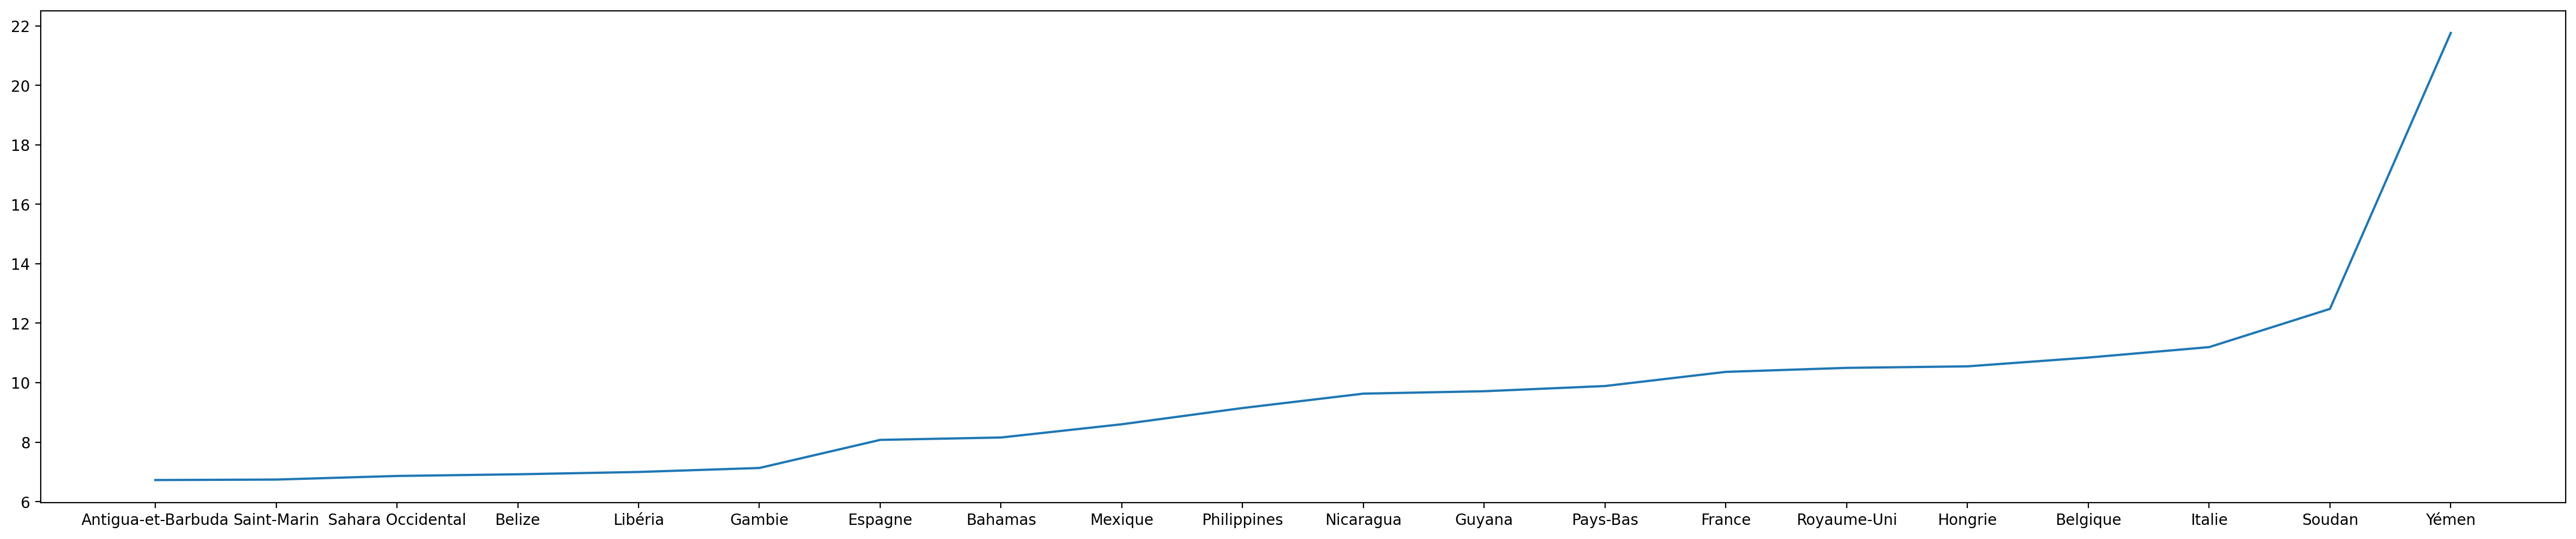

In [11]:
#Taux de décès par pays
plt.rcParams['figure.figsize'] = [30, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce
plt.plot(tdeces)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

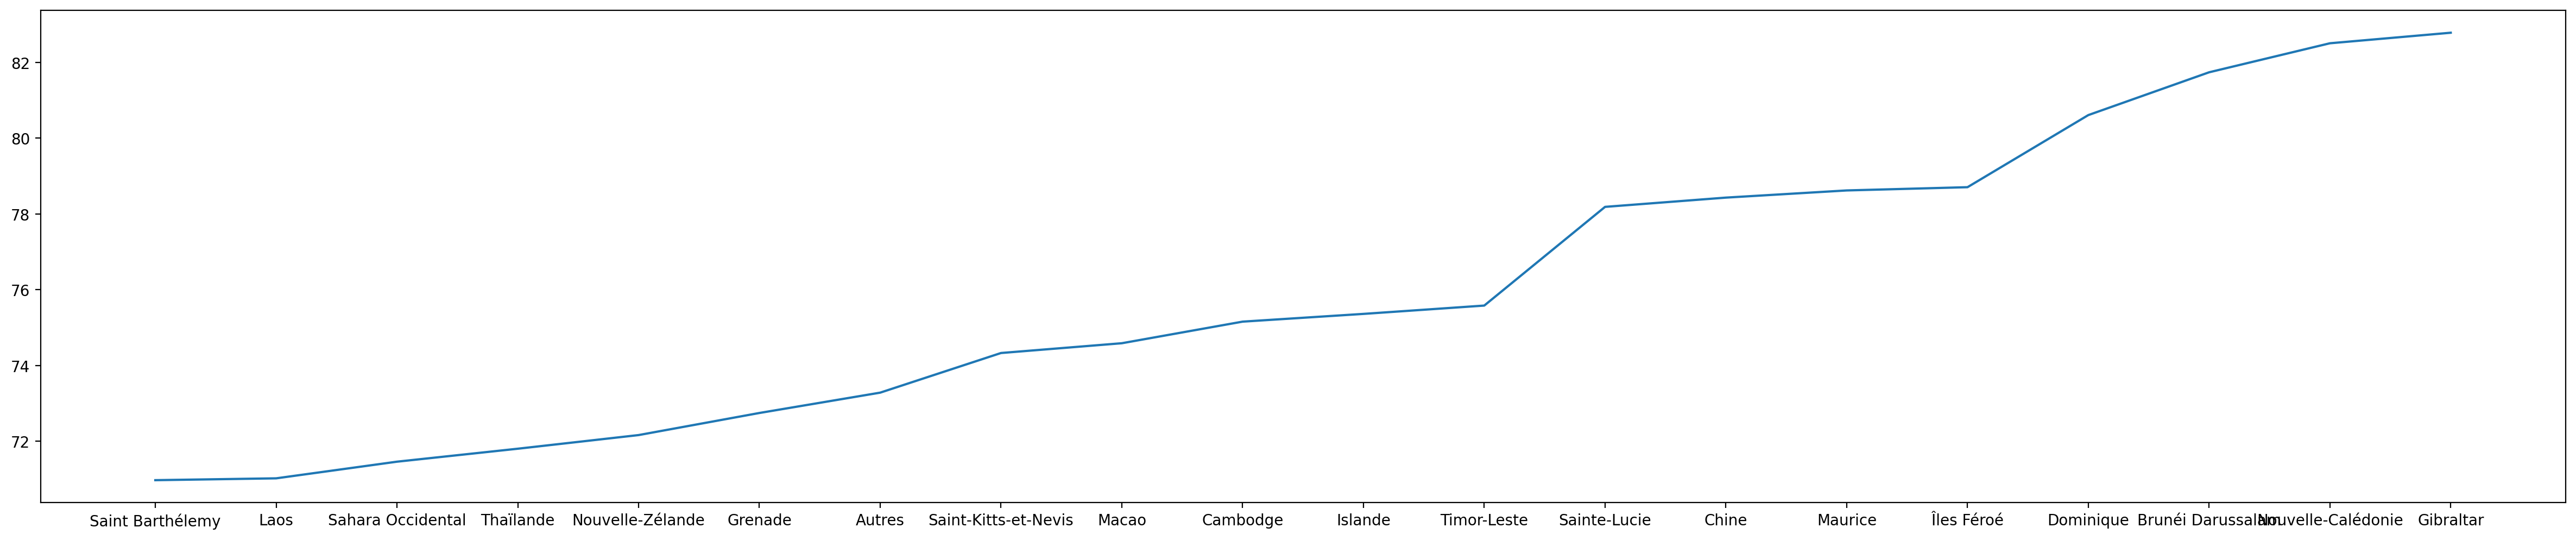

In [12]:
plt.plot(tguerison)
plt.show

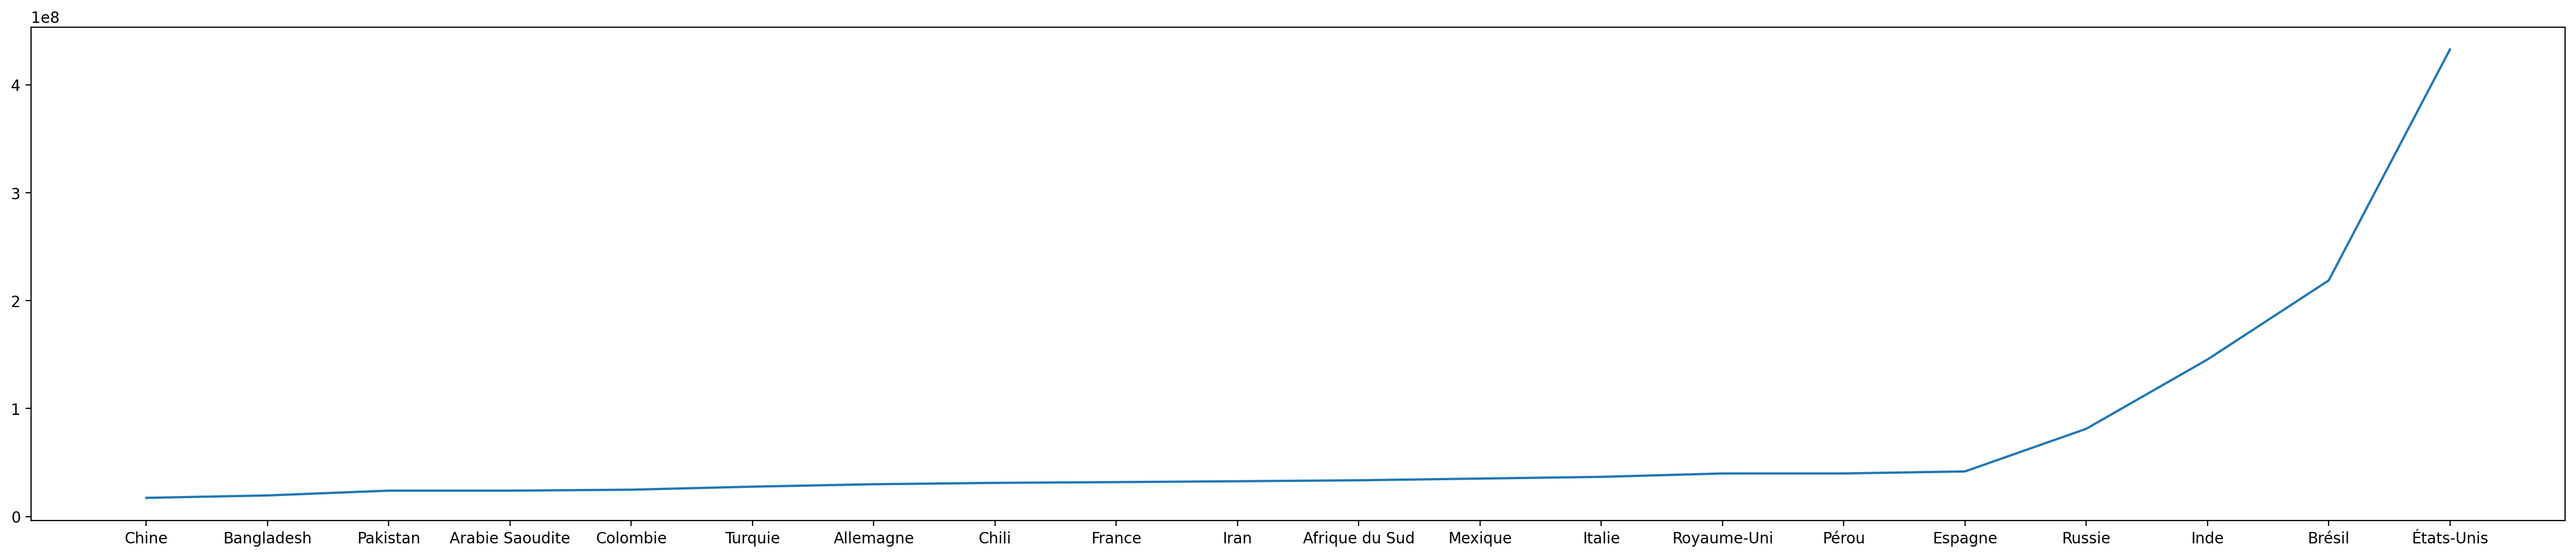

In [13]:
#nombre d'infections par Pays
plt.plot(corona.groupby("Pays").Infections.sum().sort_values()[-20:])

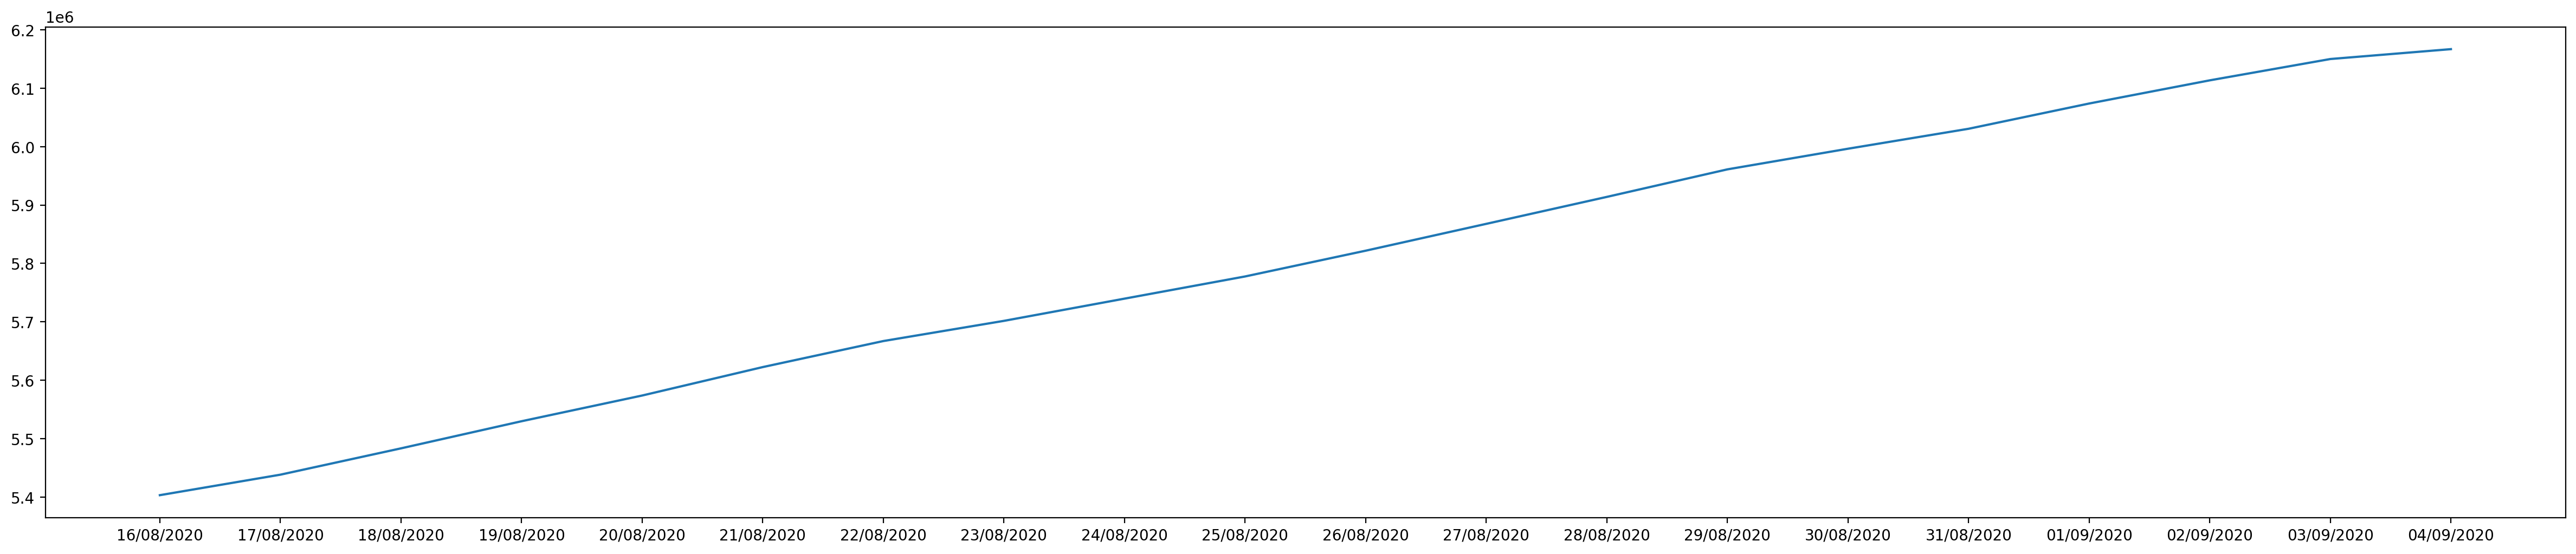

In [14]:
#nombre d'infections dans le temps aux Etats-Unis
plt.plot(corona[(corona.Pays=="États-Unis")].groupby("Date").Infections.sum().sort_values()[-20:])